<div style="width:image width px; font-size:75%; text-align:right;">
    <img src="img/kolby-milton-njOuW7E1y5g-unsplash.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Foto von Kolby Milton auf Unsplash</figcaption>
</div>

In [ ]:
# Foto von <a href="https://unsplash.com/@kolbymilton?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kolby Milton</a> auf <a href="https://unsplash.com/de/fotos/njOuW7E1y5g?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

In [74]:
import numpy as np
import pandas as pd
import arrow
import seaborn as sns
import matplotlib.pyplot as plt

## Import and cleaning

In [101]:
from dataclasses import dataclass

@dataclass(frozen=True)
class Timing:
    """Represents a sector or lap time."""
    hours: np.int64
    minutes: np.int64
    seconds: np.int64
    milliseconds: np.int64

    def as_milliseconds(self) -> np.int64:
        return self.hours * 3600000 + self.minutes * 60000 + self.seconds * 1000 + self.milliseconds
    
    def as_timedelta(self) -> pd.Timedelta:
        return pd.Timedelta(milliseconds=self.as_milliseconds())
    
    def parse(time: str) -> "Timing":
        """Parses a timing string in the format "h:mm:ss.SSS" into a Timing object."""
    
        rest, milliseconds = time.split(".")
        secs = mins = hours = 0

        match rest.split(":"):
            case [hours, minutes, seconds]:
                hours = int(hours)
                mins = int(minutes)
                secs = int(seconds)
            case [minutes, seconds]:
                mins = int(minutes)
                secs = int(seconds)
            case [seconds]:
                secs = int(seconds)
            case _:
                raise ValueError(f"Invalid laptime string: {time}")
            
        return Timing(hours, mins, secs, int(milliseconds))
    
# def timing_to_timedelta(t: str) -> pd.Timedelta:
#     """Converts a timing string into a timedelta."""
#     return Timing.parse(t).as_timedelta()
def timing_to_timedelta(t: str) -> np.int64:
    return Timing.parse(t).as_milliseconds()

In [206]:
df_2023_24_race_sector_parts = []
for f in ("data/2023/24h/race_rennen_sektorzeiten_part_1.csv", "data/2023/24h/race_rennen_sektorzeiten_part_2.csv"):
    part = pd.read_csv(
        f,
        delimiter=";",
        low_memory=False,
        converters={
            "RUNDENZEIT": timing_to_timedelta,
            "THEORETISCHE_BESTZEIT": timing_to_timedelta,
            "KLASSE": str.strip,
            "KLASSESORT": str.strip,
            "UNTERKLASSE": str.strip,
            "KLASSEKURZ": str.strip,
        },
    )
    df_2023_24_race_sector_parts.append(part)
        
df_2023_24_race_sector = pd.concat(df_2023_24_race_sector_parts)


df_2023_24_race_laps = pd.read_csv(
    "data/2023/24h/race_rennen_laps.csv",
    delimiter=";",
    converters={
        "RUNDENZEIT": timing_to_timedelta,
    },
)


df_2023_24_race_sector["FAHRER_NAME"] = df_2023_24_race_sector.apply(
    lambda x: f"{x.iloc[3 + (x['FAHRER_NR'] - 1) * 8]}, {x.iloc[4 + (x['FAHRER_NR'] - 1) * 8]}",
    axis=1
)

df_2023_24_race_sector["FAHRER_LIZENZ"] = df_2023_24_race_sector.apply(
    lambda x: x.iloc[8 + (x['FAHRER_NR'] - 1) * 8],
    axis=1
)

df_2023_24_race_sector.drop(
    inplace=True,
    columns=[
        "NATION", "KUERZEL", "TEAM",
        "FAHRER1_NAME",
        "FAHRER1_VORNAME",
        "FAHRER1_ORT",
        "FAHRER1_SPONSORLIZENZ",
        "FAHRER1_SPONSOR",
        "FAHRER1_LIZENZ",
        "FAHRER1_NATION",
        "FAHRER1_PUNKTEWERTUNG",
        "FAHRER2_NAME",
        "FAHRER2_VORNAME",
        "FAHRER2_ORT",
        "FAHRER2_SPONSORLIZENZ",
        "FAHRER2_SPONSOR",
        "FAHRER2_LIZENZ",
        "FAHRER2_NATION",
        "FAHRER2_PUNKTEWERTUNG",
        "FAHRER3_NAME",
        "FAHRER3_VORNAME",
        "FAHRER3_ORT",
        "FAHRER3_SPONSORLIZENZ",
        "FAHRER3_SPONSOR",
        "FAHRER3_LIZENZ",
        "FAHRER3_NATION",
        "FAHRER3_PUNKTEWERTUNG",
        "FAHRER4_NAME",
        "FAHRER4_VORNAME",
        "FAHRER4_ORT",
        "FAHRER4_SPONSORLIZENZ",
        "FAHRER4_SPONSOR",
        "FAHRER4_LIZENZ",
        "FAHRER4_NATION",
        "FAHRER4_PUNKTEWERTUNG",
        "FAHRER5_NAME",
        "FAHRER5_VORNAME",
        "FAHRER5_ORT",
        "FAHRER5_SPONSORLIZENZ",
        "FAHRER5_SPONSOR",
        "FAHRER5_LIZENZ",
        "FAHRER5_NATION",
        "FAHRER5_PUNKTEWERTUNG",
        "FAHRER6_NAME",
        "FAHRER6_VORNAME",
        "FAHRER6_ORT",
        "FAHRER6_SPONSORLIZENZ",
        "FAHRER6_SPONSOR",
        "FAHRER6_LIZENZ",
        "FAHRER6_NATION",
        "FAHRER6_PUNKTEWERTUNG",
        "FAHRER7_NAME",
        "FAHRER7_VORNAME",
        "FAHRER7_ORT",
        "FAHRER7_SPONSORLIZENZ",
        "FAHRER7_SPONSOR",
        "FAHRER7_LIZENZ",
        "FAHRER7_NATION",
        "FAHRER7_PUNKTEWERTUNG",
        "FAHRER8_NAME",
        "FAHRER8_VORNAME",
        "FAHRER8_ORT",
        "FAHRER8_SPONSORLIZENZ",
        "FAHRER8_SPONSOR",
        "FAHRER8_LIZENZ",
        "FAHRER8_NATION",
        "FAHRER8_PUNKTEWERTUNG",
        "RUNDENZEIT_IN_SEKUNDEN",
        "SEKTOR1_KMH", "SEKTOR1_BESTE_SPEED",
        "SEKTOR2_KMH", "SEKTOR2_BESTE_SPEED",
        "SEKTOR3_KMH", "SEKTOR3_BESTE_SPEED",
        "SEKTOR4_KMH", "SEKTOR4_BESTE_SPEED",
        "SEKTOR5_KMH", "SEKTOR5_BESTE_SPEED",
        "SEKTOR6_KMH", "SEKTOR6_BESTE_SPEED",
        "SEKTOR7_KMH", "SEKTOR7_BESTE_SPEED",
        "SEKTOR8_KMH", "SEKTOR8_BESTE_SPEED",
        "SEKTOR9_KMH", "SEKTOR9_BESTE_SPEED",
        "TOPSPEED_KMH",
        "TOPSPEED_BESTE_SPEED",
        "TOPSPEED_KMH2",
        "TOPSPEED_BESTE_SPEED2",
        "TOPSPEED_KMH3",
        "TOPSPEED_BESTE_SPEED3",
        "SEKTOR_BESTE_SUMME",
        "RANG",
        "BEWERBERLIZENZ"
    ]
)

df_2023_24_race_sector

,STNR,FAHRER_NR,BEWERBER,FAHRZEUG,RUNDE_NR,DURCHGANGSZEIT,TAGESZEIT,RUNDENZEIT,DIESCHNELLSTE,KLASSE,...,RUNDE_NR_TEXT,WET,PRO,PROAM,PRIO,STINT,LAPINSTINT,THEORETISCHE_BESTZEIT,FAHRER_NAME,FAHRER_LIZENZ
0,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,1,16:08:34.579,16:08:34.579,510240,N,SP 9,...,1,0,1,0,0,1,1,490939,"Lind, Dennis",ITC-B05061
1,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,2,16:16:53.665,16:16:53.665,499086,N,SP 9,...,2,0,1,0,0,1,2,490939,"Lind, Dennis",ITC-B05061
2,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,3,16:25:18.888,16:25:18.888,505223,N,SP 9,...,3,0,1,0,0,1,3,490939,"Lind, Dennis",ITC-B05061
3,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,4,16:33:45.471,16:33:45.471,506583,N,SP 9,...,4,0,1,0,0,1,4,490939,"Lind, Dennis",ITC-B05061
4,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,5,16:42:14.984,16:42:14.984,509513,N,SP 9,...,5p,0,1,0,0,1,5,490939,"Lind, Dennis",ITC-B05061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8473,911,1,Manthey EMA,Porsche 911 GT3 R (992),58,24:52:42.088,00:52:42.088,500986,N,SP 9,...,58,0,1,0,0,9,2,489081,"Christensen, Michael",ITC-A056358
8474,911,1,Manthey EMA,Porsche 911 GT3 R (992),59,25:01:03.794,01:01:03.794,501706,N,SP 9,...,59,0,1,0,0,9,3,489081,"Christensen, Michael",ITC-A056358
8475,911,1,Manthey EMA,Porsche 911 GT3 R (992),60,25:09:42.582,01:09:42.582,518788,N,SP 9,...,60,0,1,0,0,9,4,489081,"Christensen, Michael",ITC-A056358
8476,911,1,Manthey EMA,Porsche 911 GT3 R (992),61,25:18:32.050,01:18:32.050,529468,N,SP 9,...,61,0,1,0,0,9,5,489081,"Christensen, Michael",ITC-A056358


,STNR,FAHRER_NR,BEWERBER,FAHRZEUG,RUNDE_NR,DURCHGANGSZEIT,TAGESZEIT,RUNDENZEIT,DIESCHNELLSTE,KLASSE,...,PRIO,STINT,LAPINSTINT,THEORETISCHE_BESTZEIT,FAHRER_NAME,FAHRER_LIZENZ,RUNDENZEIT_KLASSE_Q1,RUNDENZEIT_KLASSE_Q2,RUNDENZEIT_KLASSE_Q3,RUNDENZEIT_KLASSE_OUTLIER
0,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,1,16:08:34.579,16:08:34.579,510240,N,SP 9,...,0,1,1,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
1,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,2,16:16:53.665,16:16:53.665,499086,N,SP 9,...,0,1,2,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
2,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,3,16:25:18.888,16:25:18.888,505223,N,SP 9,...,0,1,3,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
3,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,4,16:33:45.471,16:33:45.471,506583,N,SP 9,...,0,1,4,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
6,1,2,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,7,17:01:10.942,17:01:10.942,499129,N,SP 9,...,0,2,2,490939,"Drudi, Mattia",ITC-B349,501583.0,510952.0,528441.0,568728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,911,2,Manthey EMA,Porsche 911 GT3 R (992),55,24:24:33.675,00:24:33.675,503446,N,SP 9,...,0,8,6,489081,"Estre, Kevin",ITC-A171715,501583.0,510952.0,528441.0,568728.0
8473,911,1,Manthey EMA,Porsche 911 GT3 R (992),58,24:52:42.088,00:52:42.088,500986,N,SP 9,...,0,9,2,489081,"Christensen, Michael",ITC-A056358,501583.0,510952.0,528441.0,568728.0
8474,911,1,Manthey EMA,Porsche 911 GT3 R (992),59,25:01:03.794,01:01:03.794,501706,N,SP 9,...,0,9,3,489081,"Christensen, Michael",ITC-A056358,501583.0,510952.0,528441.0,568728.0
8475,911,1,Manthey EMA,Porsche 911 GT3 R (992),60,25:09:42.582,01:09:42.582,518788,N,SP 9,...,0,9,4,489081,"Christensen, Michael",ITC-A056358,501583.0,510952.0,528441.0,568728.0


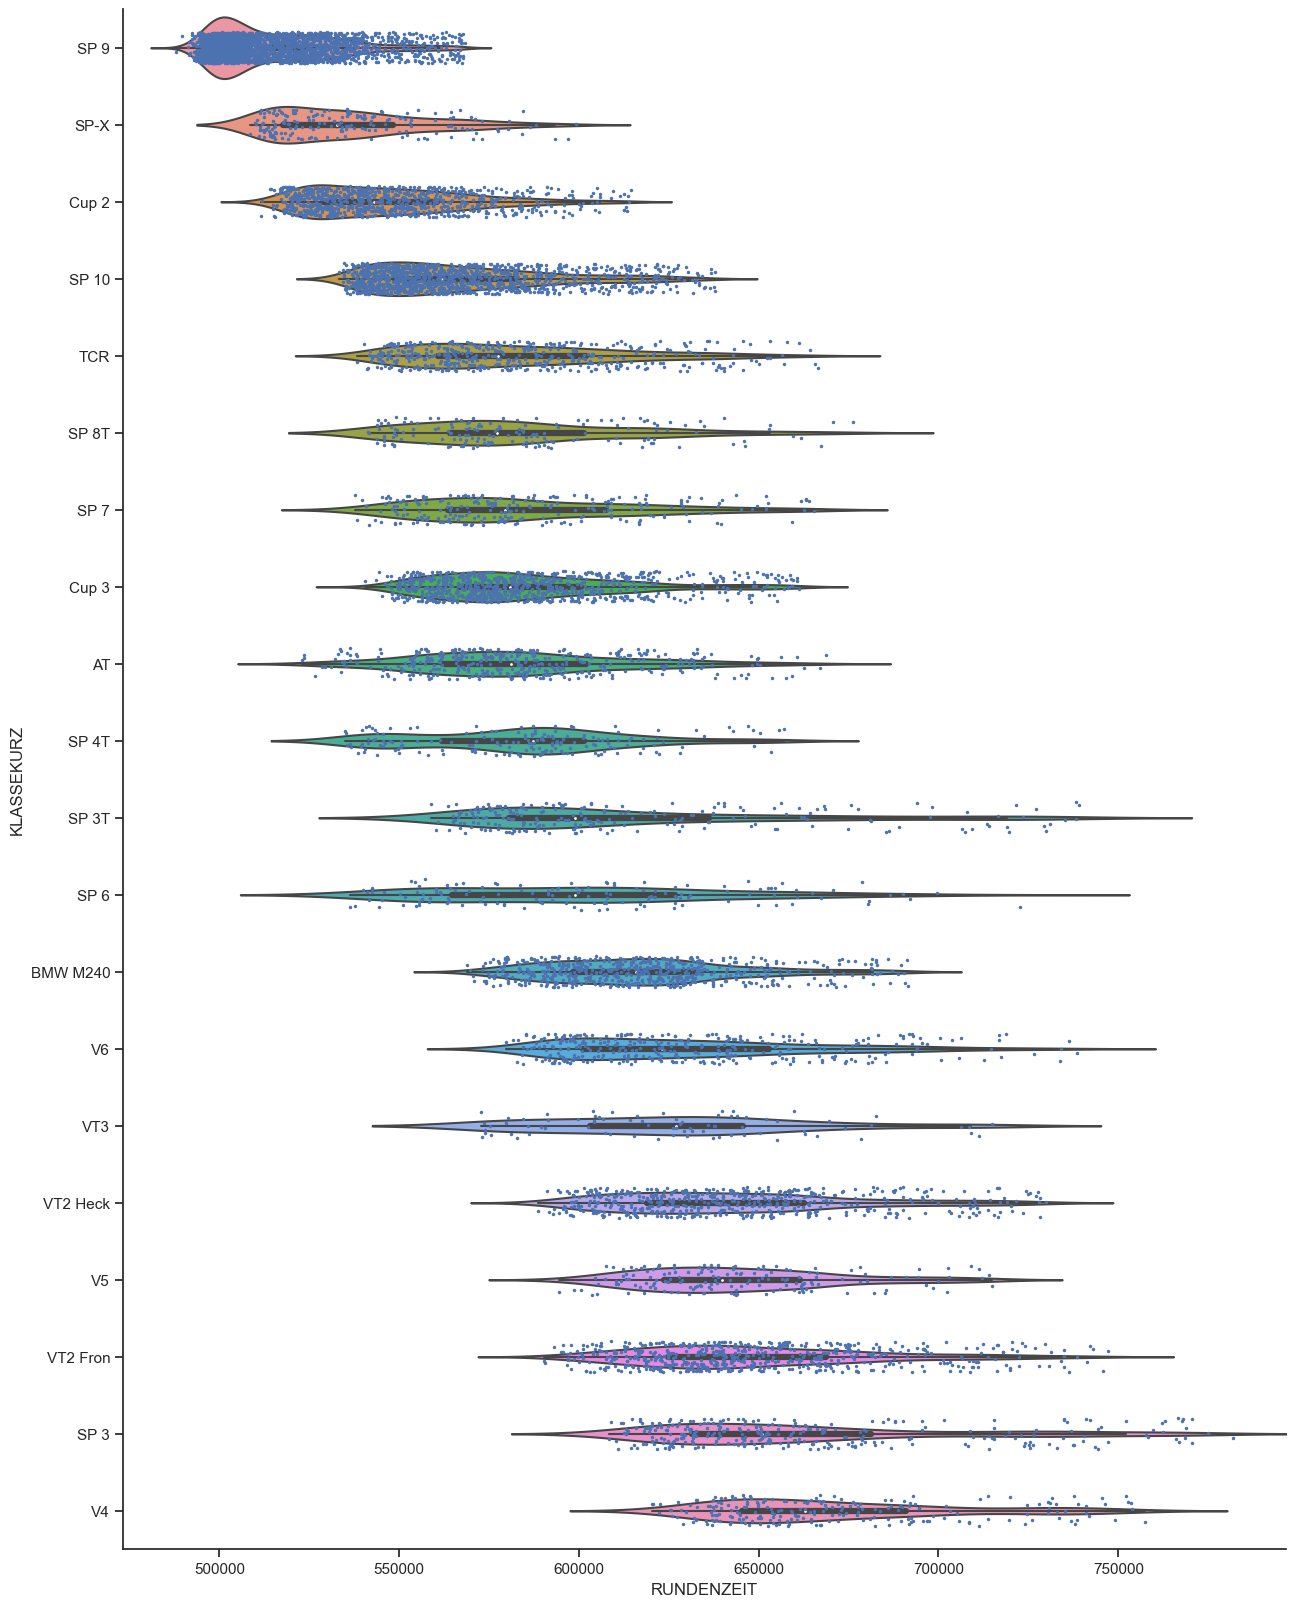

In [216]:
df_lapdist_by_class = pd.DataFrame(df_2023_24_race_sector.query("INPIT == 'N'"))

df_lapdist_by_class["RUNDENZEIT_KLASSE_Q1"] = df_lapdist_by_class.groupby("KLASSEKURZ")[
    "RUNDENZEIT"
].transform(np.quantile, q=0.25)
df_lapdist_by_class["RUNDENZEIT_KLASSE_Q2"] = df_lapdist_by_class.groupby("KLASSEKURZ")[
    "RUNDENZEIT"
].transform(np.quantile, q=0.5)
df_lapdist_by_class["RUNDENZEIT_KLASSE_Q3"] = df_lapdist_by_class.groupby("KLASSEKURZ")[
    "RUNDENZEIT"
].transform(np.quantile, q=0.75)
df_lapdist_by_class["RUNDENZEIT_KLASSE_OUTLIER"] = (
    df_lapdist_by_class["RUNDENZEIT_KLASSE_Q3"]
    + (
        df_lapdist_by_class["RUNDENZEIT_KLASSE_Q3"]
        - df_lapdist_by_class["RUNDENZEIT_KLASSE_Q1"]
    )
    * 1.5
)


f, ax = plt.subplots(figsize=(15, 20))
# ax.set_xscale("log")

df_lapdist_by_class_wo_outliers = df_lapdist_by_class.query(
    "RUNDENZEIT < RUNDENZEIT_KLASSE_OUTLIER"
).sort_values(by="RUNDENZEIT_KLASSE_Q2")

sns.set(font="Inter")
sns.set_style("ticks")

sns.violinplot(
    # y=df_2023_24_race_sector.query("STNR == [1, 911]")["FAHRZEUG"],
    # y=df_2023_24_race_sector["FAHRZEUG"],
    y=df_lapdist_by_class_wo_outliers["KLASSEKURZ"],
    x=df_lapdist_by_class_wo_outliers["RUNDENZEIT"],
)

sns.stripplot(
    y=df_lapdist_by_class_wo_outliers["KLASSEKURZ"],
    x=df_lapdist_by_class_wo_outliers["RUNDENZEIT"],
    jitter=0.2,
    size=2.5,
)

sns.despine()

# df_lapdist_by_class.groupby("KLASSEKURZ")[["RUNDENZEIT"]].quantile(q=0.75)


df_lapdist_by_class


,STNR,FAHRER_NR,BEWERBER,FAHRZEUG,RUNDE_NR,DURCHGANGSZEIT,TAGESZEIT,RUNDENZEIT,DIESCHNELLSTE,KLASSE,...,PRIO,STINT,LAPINSTINT,THEORETISCHE_BESTZEIT,FAHRER_NAME,FAHRER_LIZENZ,RUNDENZEIT_KLASSE_Q1,RUNDENZEIT_KLASSE_Q2,RUNDENZEIT_KLASSE_Q3,RUNDENZEIT_KLASSE_OUTLIER
0,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,1,16:08:34.579,16:08:34.579,510240,N,SP 9,...,0,1,1,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
1,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,2,16:16:53.665,16:16:53.665,499086,N,SP 9,...,0,1,2,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
2,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,3,16:25:18.888,16:25:18.888,505223,N,SP 9,...,0,1,3,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
3,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,4,16:33:45.471,16:33:45.471,506583,N,SP 9,...,0,1,4,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
6,1,2,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,7,17:01:10.942,17:01:10.942,499129,N,SP 9,...,0,2,2,490939,"Drudi, Mattia",ITC-B349,501583.0,510952.0,528441.0,568728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,911,2,Manthey EMA,Porsche 911 GT3 R (992),55,24:24:33.675,00:24:33.675,503446,N,SP 9,...,0,8,6,489081,"Estre, Kevin",ITC-A171715,501583.0,510952.0,528441.0,568728.0
8473,911,1,Manthey EMA,Porsche 911 GT3 R (992),58,24:52:42.088,00:52:42.088,500986,N,SP 9,...,0,9,2,489081,"Christensen, Michael",ITC-A056358,501583.0,510952.0,528441.0,568728.0
8474,911,1,Manthey EMA,Porsche 911 GT3 R (992),59,25:01:03.794,01:01:03.794,501706,N,SP 9,...,0,9,3,489081,"Christensen, Michael",ITC-A056358,501583.0,510952.0,528441.0,568728.0
8475,911,1,Manthey EMA,Porsche 911 GT3 R (992),60,25:09:42.582,01:09:42.582,518788,N,SP 9,...,0,9,4,489081,"Christensen, Michael",ITC-A056358,501583.0,510952.0,528441.0,568728.0


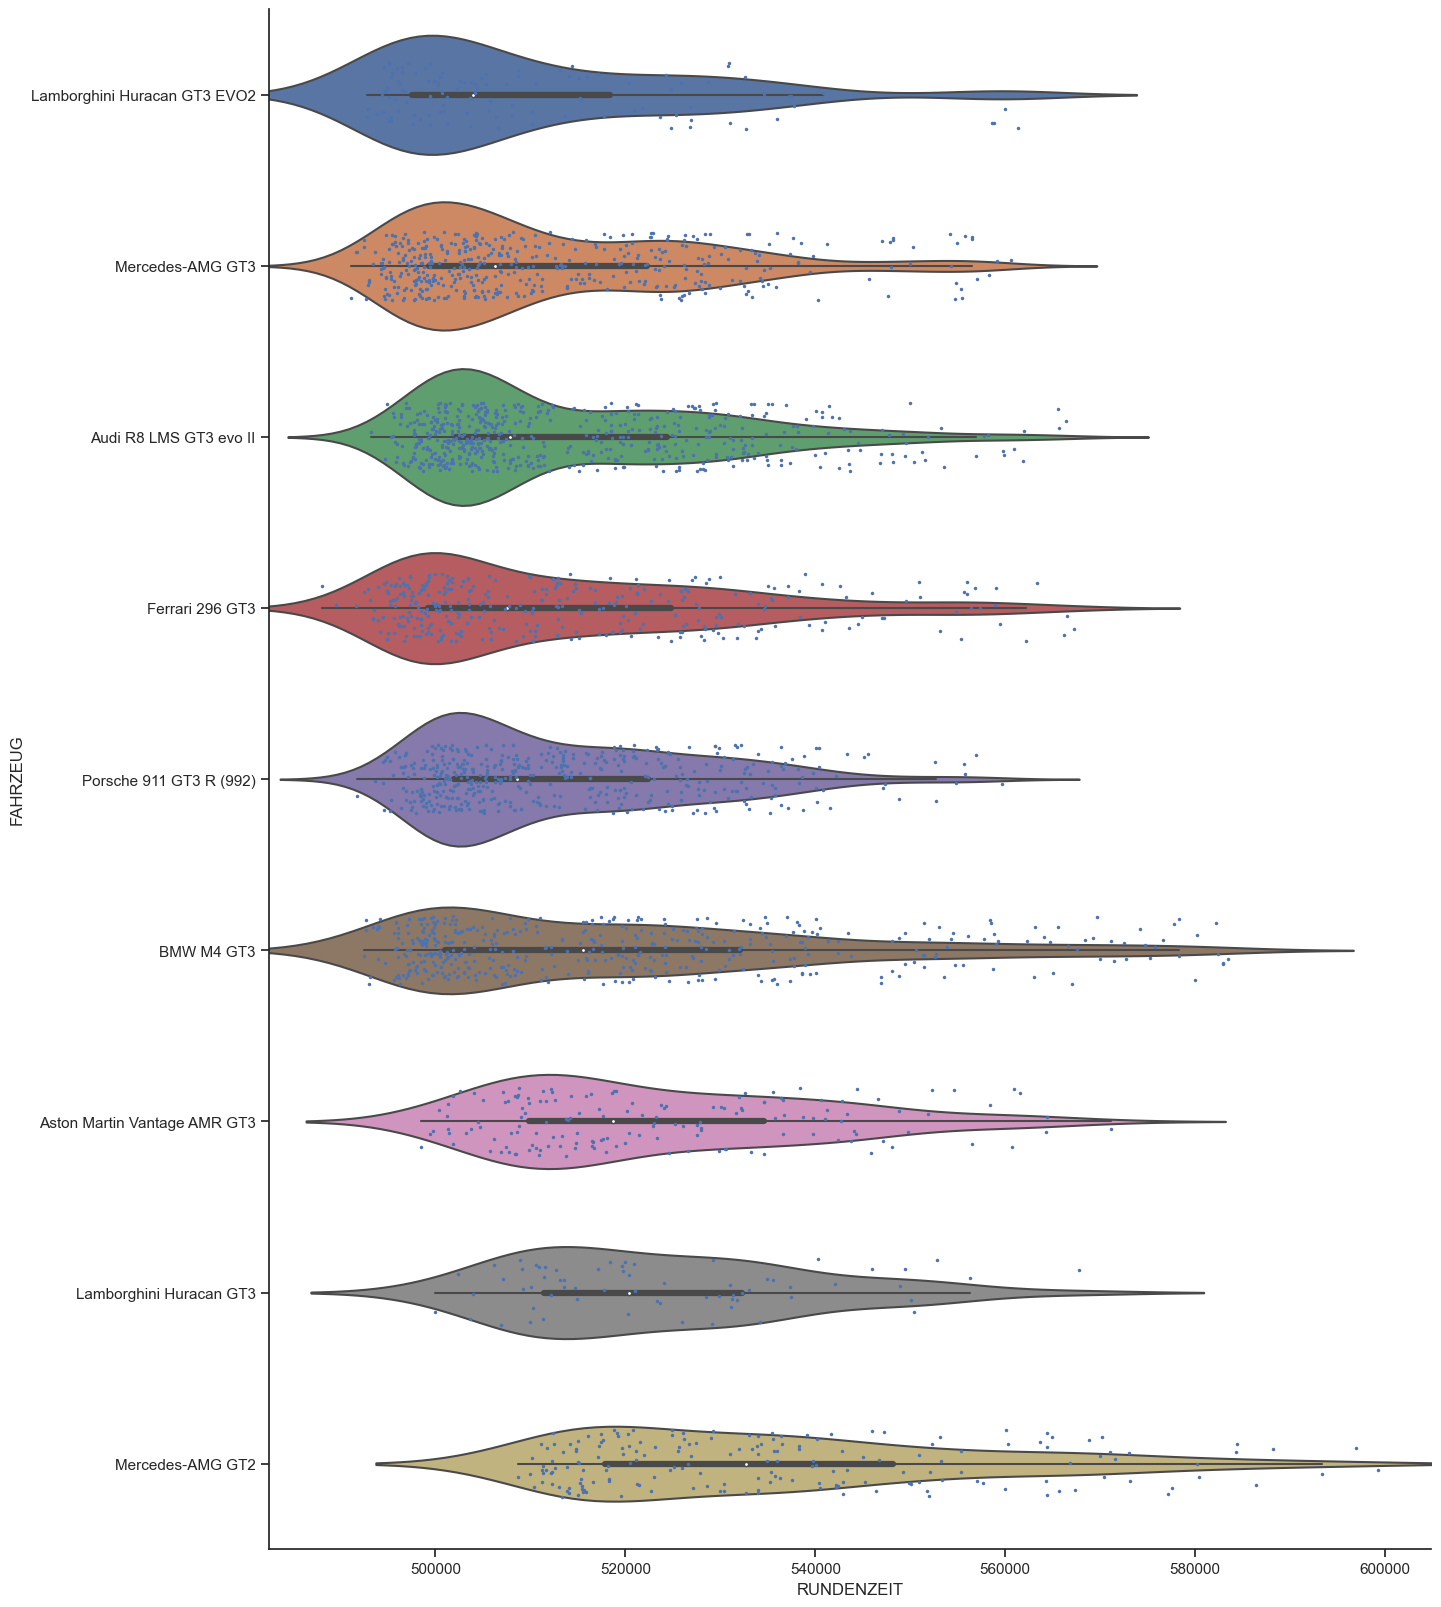

In [221]:
df_2023_24_gt3 =  pd.DataFrame(df_2023_24_race_sector.query("KLASSEKURZ == ['SP 9', 'SP-X'] & INPIT == 'N'"))

df_2023_24_gt3["RUNDENZEIT_FZ_Q1"] = df_2023_24_gt3.groupby("FAHRZEUG")[
    "RUNDENZEIT"
].transform(np.quantile, q=0.25)
df_2023_24_gt3["RUNDENZEIT_FZ_Q2"] = df_2023_24_gt3.groupby("FAHRZEUG")[
    "RUNDENZEIT"
].transform(np.quantile, q=0.5)
df_2023_24_gt3["RUNDENZEIT_FZ_Q3"] = df_2023_24_gt3.groupby("FAHRZEUG")[
    "RUNDENZEIT"
].transform(np.quantile, q=0.75)

df_2023_24_gt3["RUNDENZEIT_FZ_OUTLIER"] = (
    df_2023_24_gt3["RUNDENZEIT_FZ_Q3"]
    + (
        df_2023_24_gt3["RUNDENZEIT_FZ_Q3"]
        - df_2023_24_gt3["RUNDENZEIT_FZ_Q1"]
    )
    * 1.5
)


f, ax = plt.subplots(figsize=(15, 20))
# ax.set_xscale("log")

df_2023_24_gt3_wo_outliers = df_2023_24_gt3.query(
    "RUNDENZEIT < RUNDENZEIT_FZ_OUTLIER"
).sort_values(by="RUNDENZEIT_FZ_Q2")
# df_2023_24_gt3_wo_outliers = df_2023_24_gt3
sns.violinplot(
    # y=df_2023_24_race_sector.query("STNR == [1, 911]")["FAHRZEUG"],
    # y=df_2023_24_race_sector["FAHRZEUG"],
    y=df_2023_24_gt3_wo_outliers["FAHRZEUG"],
    x=df_2023_24_gt3_wo_outliers["RUNDENZEIT"],
)

sns.stripplot(
    y=df_2023_24_gt3_wo_outliers["FAHRZEUG"],
    x=df_2023_24_gt3_wo_outliers["RUNDENZEIT"],
    jitter=0.2,
    size=2.5,
)

sns.despine()

# df_lapdist_by_class.groupby("KLASSEKURZ")[["RUNDENZEIT"]].quantile(q=0.75)


df_lapdist_by_class


,STNR,FAHRER_NR,BEWERBER,FAHRZEUG,RUNDE_NR,DURCHGANGSZEIT,TAGESZEIT,RUNDENZEIT,DIESCHNELLSTE,KLASSE,...,PRIO,STINT,LAPINSTINT,THEORETISCHE_BESTZEIT,FAHRER_NAME,FAHRER_LIZENZ,RUNDENZEIT_KLASSE_Q1,RUNDENZEIT_KLASSE_Q2,RUNDENZEIT_KLASSE_Q3,RUNDENZEIT_KLASSE_OUTLIER
0,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,1,16:08:34.579,16:08:34.579,510240,N,SP 9,...,0,1,1,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
1,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,2,16:16:53.665,16:16:53.665,499086,N,SP 9,...,0,1,2,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
2,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,3,16:25:18.888,16:25:18.888,505223,N,SP 9,...,0,1,3,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
3,1,4,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,4,16:33:45.471,16:33:45.471,506583,N,SP 9,...,0,1,4,490939,"Lind, Dennis",ITC-B05061,501583.0,510952.0,528441.0,568728.0
6,1,2,Audi Sport Team Scherer PHX,Audi R8 LMS GT3 evo II,7,17:01:10.942,17:01:10.942,499129,N,SP 9,...,0,2,2,490939,"Drudi, Mattia",ITC-B349,501583.0,510952.0,528441.0,568728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,911,2,Manthey EMA,Porsche 911 GT3 R (992),55,24:24:33.675,00:24:33.675,503446,N,SP 9,...,0,8,6,489081,"Estre, Kevin",ITC-A171715,501583.0,510952.0,528441.0,568728.0
8473,911,1,Manthey EMA,Porsche 911 GT3 R (992),58,24:52:42.088,00:52:42.088,500986,N,SP 9,...,0,9,2,489081,"Christensen, Michael",ITC-A056358,501583.0,510952.0,528441.0,568728.0
8474,911,1,Manthey EMA,Porsche 911 GT3 R (992),59,25:01:03.794,01:01:03.794,501706,N,SP 9,...,0,9,3,489081,"Christensen, Michael",ITC-A056358,501583.0,510952.0,528441.0,568728.0
8475,911,1,Manthey EMA,Porsche 911 GT3 R (992),60,25:09:42.582,01:09:42.582,518788,N,SP 9,...,0,9,4,489081,"Christensen, Michael",ITC-A056358,501583.0,510952.0,528441.0,568728.0


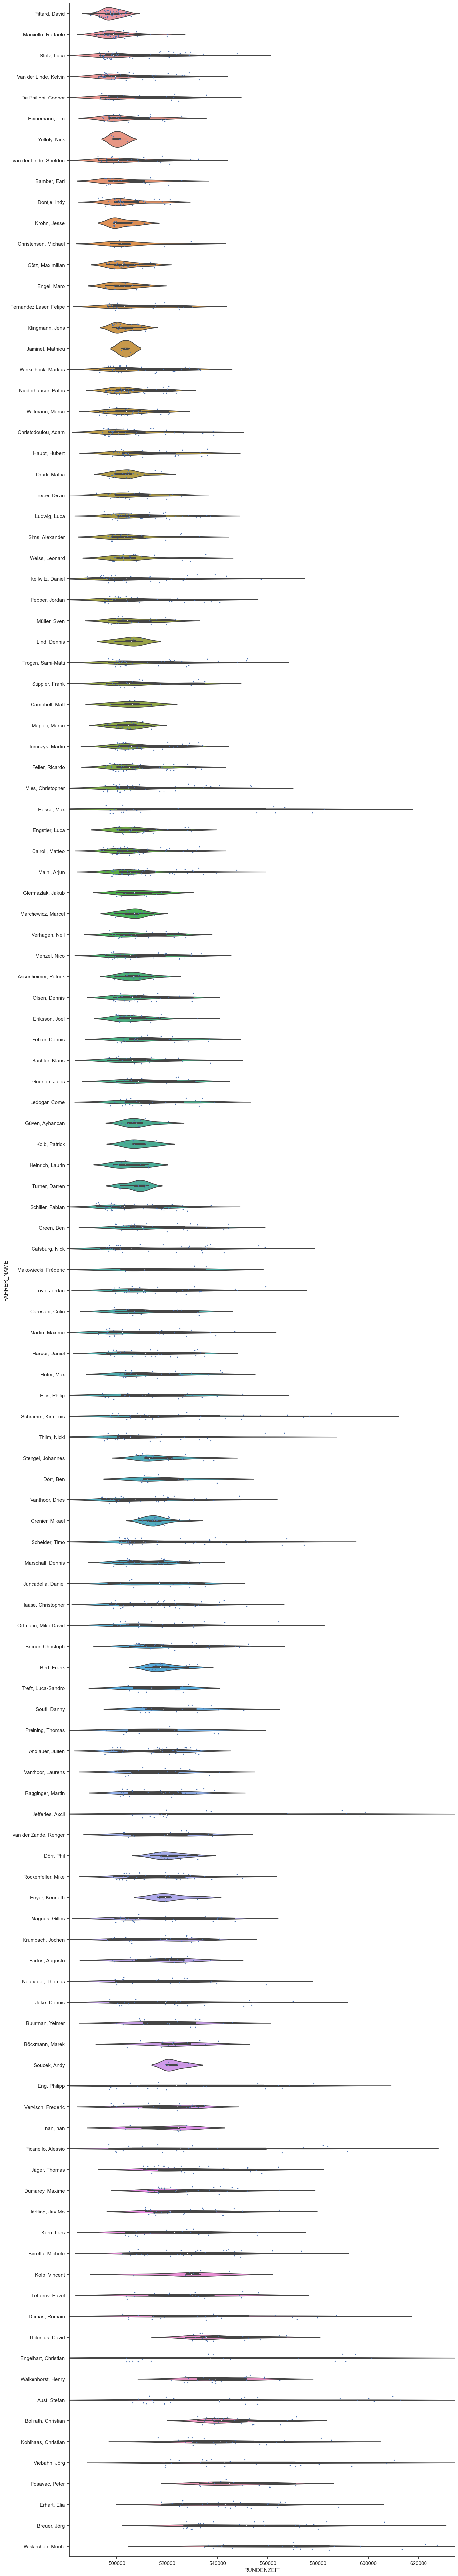

In [222]:
df_2023_24_gt3["RUNDENZEIT_FAHRER_Q1"] = df_2023_24_gt3.groupby("FAHRER_NAME")[
    "RUNDENZEIT"
].transform(np.quantile, q=0.25)
df_2023_24_gt3["RUNDENZEIT_FAHRER_Q2"] = df_2023_24_gt3.groupby("FAHRER_NAME")[
    "RUNDENZEIT"
].transform(np.quantile, q=0.5)
df_2023_24_gt3["RUNDENZEIT_FAHRER_Q3"] = df_2023_24_gt3.groupby("FAHRER_NAME")[
    "RUNDENZEIT"
].transform(np.quantile, q=0.75)

df_2023_24_gt3["RUNDENZEIT_FAHRER_OUTLIER"] = (
    df_2023_24_gt3["RUNDENZEIT_FAHRER_Q3"]
    + (
        df_2023_24_gt3["RUNDENZEIT_FAHRER_Q3"]
        - df_2023_24_gt3["RUNDENZEIT_FAHRER_Q1"]
    )
    * 1
)

f, ax = plt.subplots(figsize=(15, 100))
# ax.set_xscale("log")

df_2023_24_gt3_wo_outliers = df_2023_24_gt3.query(
    "RUNDENZEIT < RUNDENZEIT_FAHRER_OUTLIER"
).sort_values(by="RUNDENZEIT_FAHRER_Q2")

sns.violinplot(
    y=df_2023_24_gt3_wo_outliers["FAHRER_NAME"],
    x=df_2023_24_gt3_wo_outliers["RUNDENZEIT"],
)

sns.stripplot(
    y=df_2023_24_gt3_wo_outliers["FAHRER_NAME"],
    x=df_2023_24_gt3_wo_outliers["RUNDENZEIT"],
    jitter=0.2,
    size=2.5,
)

sns.despine()

df_lapdist_by_class